# Tensorflow 2 Object Detection: Eval and Test



## Initial Setup
Prepare training environment

<b>Install Some Library</b></br>
<b>Install this library and then restart</b> before downgrade python version, because colab will crash if you restart after downgrading python version

In [1]:
!pip install roboflow
!pip install -U tbparse

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 

<b>Downgrade Python Version to 3.7</b></br>
TF2 Object Detection API only support python 3.7 version

In [1]:
!python --version

Python 3.10.12


In [2]:
!sudo apt-get install python3.7
!sudo apt-get update -y
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --config python3
# select python version
!sudo apt install python3-pip
!sudo apt install python3.7-distutils
!exit

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib mailcap mime-support
  python3.7-minimal
Suggested packages:
  python3.7-venv binfmt-support
The following NEW packages will be installed:
  libpython3.7-minimal libpython3.7-stdlib mailcap mime-support python3.7
  python3.7-minimal
0 upgraded, 6 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,698 kB of archives.
After this operation, 17.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 mailcap all 3.70+nmu1ubuntu1 [23.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 mime-support all 3.66 [3,696 B]
Get:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.7-minimal amd64 3.7.17-1+jammy1 [608 kB]
Get:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.7-minima

In [3]:
!python3 --version

Python 3.7.17


<b>Connect to google drive</b>

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Installation

Installing the Tensorflow Object Detection API became a lot easier with the relase of Tensorflow 2. The following few cells are all that is needed in order to install the OD API.

In [5]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 4065, done.
remote: Counting objects: 100% (4065/4065), done.
remote: Compressing objects: 100% (3110/3110), done.
remote: Total 4065 (delta 1183), reused 1937 (delta 895), pack-reused 0
Receiving objects: 100% (4065/4065), 56.43 MiB | 29.71 MiB/s, done.
Resolving deltas: 100% (1183/1183), done.


In [6]:
# Install the Object Detection API
%cd models/research/
!protoc object_detection/protos/*.proto --python_out=.
!cp object_detection/packages/tf2/setup.py .
!python3 -m pip install .

/content/models/research
Processing /content/models/research
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 49.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 403.3/403.3 KB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 KB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/3

In [7]:
#run model builder test
!python3 /content/models/research/object_detection/builders/model_builder_tf2_test.py

2024-01-21 09:36:27.493916: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-21 09:36:27.673638: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-01-21 09:36:27.673680: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-01-21 09:36:29.200018: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7:

In [8]:
import os
os.environ['PYTHONPATH'] += ":/content/models"

import sys
sys.path.append("/content/models")

## Prepare data

To train a robust model, you need a lot of pictures that vary greatly from each other. You can either take the pictures yourself or you can download them from the internet.

After collecting the images you need to label them. For this, I use [Roboflow](https://roboflow.com/) for annotating the image and convert to tfrecord format.

In [32]:
from roboflow import Roboflow
rf = Roboflow(api_key="Xm9AWClGVdtonP1oKy1b")
project = rf.workspace("kelompok-brin-dxxif").project("meningioma-detector")
dataset = project.version(1).download("tfrecord")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Meningioma-Detector-1 in tfrecord:: 100%|██████████| 11/11 [00:00<00:00, 103.62it/s]


In [33]:
!mv "Meningioma-Detector-1" brain-tumor

In [34]:
train_record_path = '/content/models/research/brain-tumor/train/meningioma.tfrecord'
test_record_path = '/content/models/research/brain-tumor/valid/meningioma.tfrecord'
labelmap_path = '/content/models/research/brain-tumor/train/meningioma_label_map.pbtxt'

## Evaluate trained model on evaluation images (Tensorboard)

In [12]:
# Model dir
model_dir = '/content/drive/MyDrive/brain_tumor_detection/Training/ssd_mobilenetv2_fpn_4/'
model_exp_dir = '/content/drive/MyDrive/brain_tumor_detection/Training/ssd_mobilenetv2_fpn_3/'

In [13]:
%load_ext tensorboard

In [ ]:
train_log_normal_model = f'{model_dir}train'
train_log_exp_model = f'{model_exp_dir}train'
# %tensorboard --logdir_spec=normalmodel:{train_log_normal_model},expmodel:{train_log_exp_model} --load_fast=false --port 7004

In [ ]:
eval_log_normal_model = f'{model_dir}eval'
eval_log_exp_model = f'{model_exp_dir}eval'
# %tensorboard --logdir_spec=normalmodel:{eval_log_normal_model},expmodel:{eval_log_exp_model} --load_fast=false --port 7005

## Plot tensorboard result with matplotlib

In [16]:
from numpy.ma.core import exp
from tbparse import SummaryReader
import matplotlib.pyplot as plt

### Train result

In [17]:
normal_model_reader = SummaryReader(train_log_normal_model)
df_normal_model = normal_model_reader.tensors

exp_model_reader = SummaryReader(train_log_exp_model)
df_exp_model = exp_model_reader.tensors

In [18]:
df_normal_model = df_normal_model.pivot(index='step', columns='tag', values='value').reset_index()
df_exp_model = df_exp_model.pivot(index='step', columns='tag', values='value').reset_index()

df_normal_model = df_normal_model.drop(columns=['train_input_images'])
df_exp_model = df_exp_model.drop(columns=['train_input_images'])

In [19]:
df_normal_model.dropna()

tag,step,Loss/classification_loss,Loss/localization_loss,Loss/regularization_loss,Loss/total_loss,learning_rate,steps_per_sec
1,100,0.279678,0.482638,0.577296,1.339612,0.031999,1.25289
2,200,0.202368,0.363402,0.575893,1.141663,0.037333,2.84067
3,300,0.14347,0.270014,0.57426,0.987743,0.042666,2.765454
4,400,0.168436,0.113174,0.572361,0.853971,0.048,2.740354
5,500,0.132115,0.097267,0.570332,0.799714,0.053333,2.75681
...,...,...,...,...,...,...,...
76,7600,0.052917,0.023098,0.375414,0.45143,0.076472,2.748257
77,7700,0.073892,0.012385,0.373228,0.459505,0.076366,2.73251
78,7800,0.05175,0.03813,0.371069,0.460949,0.076258,2.746778
79,7900,0.039941,0.019846,0.368901,0.428689,0.076149,2.747465


In [20]:
df_exp_model.dropna()

tag,step,Loss/classification_loss,Loss/localization_loss,Loss/regularization_loss,Loss/total_loss,learning_rate,steps_per_sec
1,100,0.30829,0.460064,0.576921,1.345275,0.031999,0.787679
2,200,0.171584,0.183532,0.575626,0.930742,0.037333,1.327163
3,300,0.194504,0.105801,0.574025,0.87433,0.042666,1.329235
4,400,0.129268,0.0752,0.5722,0.776669,0.048,1.327425
5,500,0.122793,0.065972,0.570147,0.758913,0.053333,1.328105
...,...,...,...,...,...,...,...
76,7600,0.048633,0.035762,0.374695,0.45909,0.076472,1.326358
77,7700,0.05306,0.028784,0.372535,0.454378,0.076366,1.3284
78,7800,0.054774,0.028793,0.370352,0.453919,0.076258,1.327095
79,7900,0.062177,0.016066,0.368197,0.44644,0.076149,1.326874


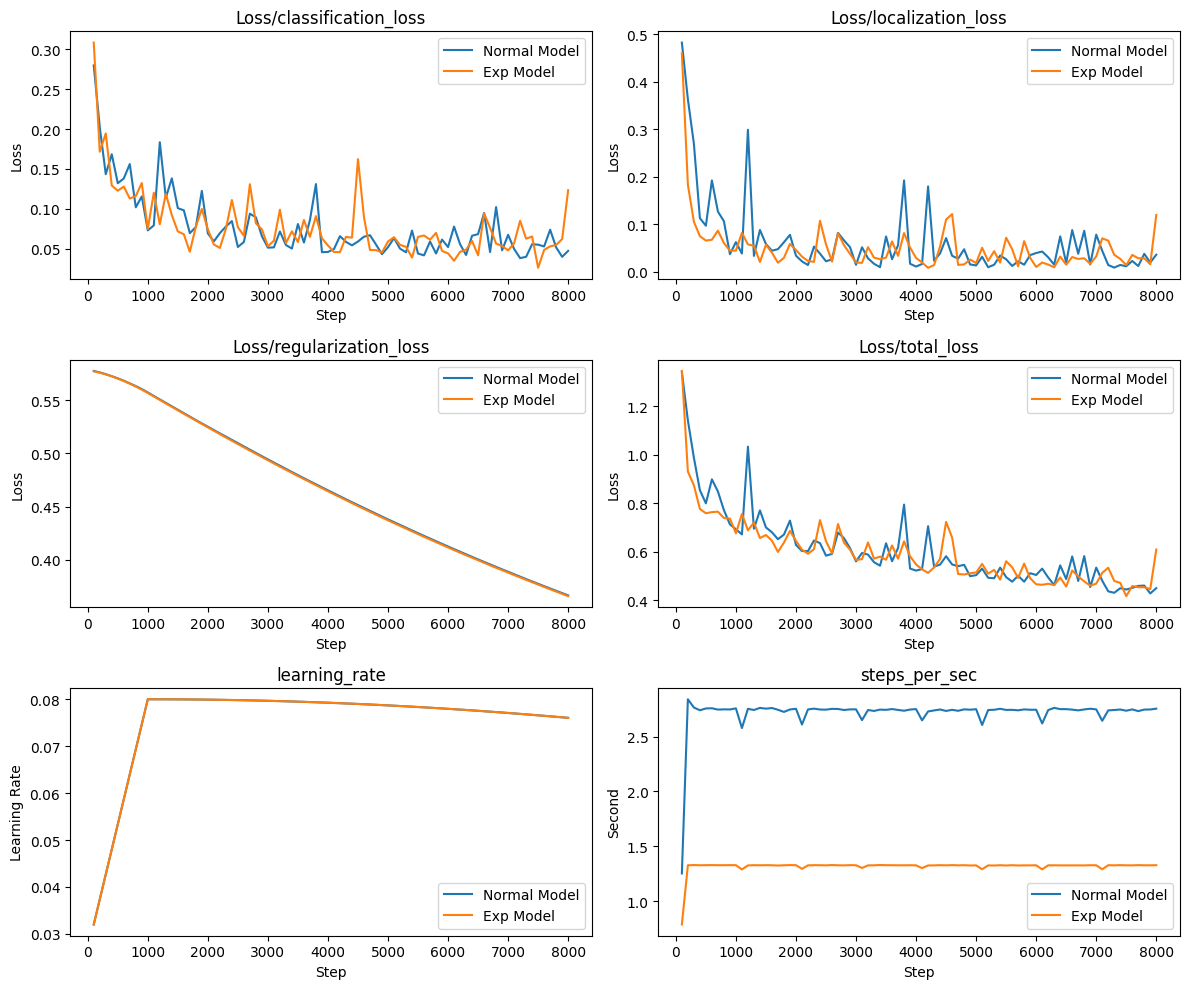

In [21]:
columns_to_compare = df_normal_model.columns.tolist()
columns_to_compare.remove('step')

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

x = 0

for i in range(0, 3):
    for j in range(0, 2):
        axes[i, j].plot(df_normal_model['step'], df_normal_model[columns_to_compare[x]], label='Normal Model')
        axes[i, j].plot(df_exp_model['step'], df_exp_model[columns_to_compare[x]], label='Exp Model')
        axes[i, j].set_title(columns_to_compare[x])
        axes[i, j].set_xlabel('Step')
        if i==2 and j==0:
            axes[i, j].set_ylabel('Learning Rate')
        elif i==2 and j==1:
            axes[i, j].set_ylabel('Second')
        else:
            axes[i, j].set_ylabel('Loss')
        axes[i, j].legend()
        x += 1

plt.tight_layout()
plt.show()

### Evaluation result

In [22]:
normal_model_reader = SummaryReader(eval_log_normal_model)
df_normal_model = normal_model_reader.tensors

exp_model_reader = SummaryReader(eval_log_exp_model)
df_exp_model = exp_model_reader.tensors

In [23]:
df_normal_model = df_normal_model.pivot(index='step', columns='tag', values='value').reset_index()
df_exp_model = df_exp_model.pivot(index='step', columns='tag', values='value').reset_index()

column_to_drop = ['eval_side_by_side_0_0', 'eval_side_by_side_1_0',
                  'eval_side_by_side_2_0', 'eval_side_by_side_3_0',
                  'eval_side_by_side_4_0', 'eval_side_by_side_5_0',
                  'eval_side_by_side_6_0', 'eval_side_by_side_7_0',
                  'eval_side_by_side_8_0', 'eval_side_by_side_9_0']

for column in column_to_drop:
    df_normal_model = df_normal_model.drop(columns=[column])
    df_exp_model = df_exp_model.drop(columns=[column])

In [24]:
df_normal_model = df_normal_model.drop(0)
df_normal_model

tag,step,DetectionBoxes_Precision/mAP,DetectionBoxes_Precision/mAP (large),DetectionBoxes_Precision/mAP (medium),DetectionBoxes_Precision/mAP (small),DetectionBoxes_Precision/mAP@.50IOU,DetectionBoxes_Precision/mAP@.75IOU,DetectionBoxes_Recall/AR@1,DetectionBoxes_Recall/AR@10,DetectionBoxes_Recall/AR@100,DetectionBoxes_Recall/AR@100 (large),DetectionBoxes_Recall/AR@100 (medium),DetectionBoxes_Recall/AR@100 (small),Loss/classification_loss,Loss/localization_loss,Loss/regularization_loss,Loss/total_loss
1,1000,0.358019,0.444855,0.561688,0.005004,0.650082,0.374188,0.385778,0.402444,0.418444,0.644286,0.61441,0.016556,1.609695,0.304554,0.557078,2.471327
2,2000,0.533435,0.674869,0.806328,0.051835,0.677997,0.645097,0.556889,0.570222,0.579556,0.81,0.832751,0.088742,0.327405,0.079441,0.524952,0.931798
3,3000,0.621394,0.886853,0.895837,0.076082,0.70878,0.693069,0.625333,0.635333,0.642,0.91,0.912664,0.107285,0.079316,0.048491,0.494313,0.622119
4,4000,0.638875,0.913939,0.902364,0.097485,0.733379,0.697687,0.637778,0.656889,0.666222,0.938571,0.922707,0.150993,0.076264,0.037098,0.465252,0.578614
5,5000,0.61308,0.905459,0.874413,0.072488,0.720471,0.693038,0.616,0.630889,0.639111,0.925714,0.888646,0.127815,0.071282,0.048579,0.437995,0.557856
6,6000,0.624325,0.90376,0.889265,0.077588,0.722562,0.694128,0.626,0.641556,0.656667,0.921429,0.909607,0.150331,0.059361,0.034549,0.412571,0.506482
7,7000,0.587657,0.862471,0.83731,0.077901,0.722827,0.693069,0.596889,0.608444,0.612667,0.91,0.856332,0.105298,0.073505,0.04847,0.388867,0.510843
8,8000,0.660866,0.943239,0.931655,0.095475,0.741531,0.69819,0.654667,0.676667,0.690667,0.965714,0.947162,0.174172,0.052182,0.031247,0.366741,0.45017


In [25]:
df_exp_model

tag,step,DetectionBoxes_Precision/mAP,DetectionBoxes_Precision/mAP (large),DetectionBoxes_Precision/mAP (medium),DetectionBoxes_Precision/mAP (small),DetectionBoxes_Precision/mAP@.50IOU,DetectionBoxes_Precision/mAP@.75IOU,DetectionBoxes_Recall/AR@1,DetectionBoxes_Recall/AR@10,DetectionBoxes_Recall/AR@100,DetectionBoxes_Recall/AR@100 (large),DetectionBoxes_Recall/AR@100 (medium),DetectionBoxes_Recall/AR@100 (small),Loss/classification_loss,Loss/localization_loss,Loss/regularization_loss,Loss/total_loss
0,1000,0.529694,0.722504,0.76769,0.07611,0.706293,0.690427,0.543556,0.556667,0.569333,0.765714,0.800873,0.127152,0.268213,0.107341,0.556597,0.932151
1,2000,0.584627,0.840257,0.834935,0.094015,0.712674,0.697501,0.591556,0.606889,0.616889,0.867143,0.858079,0.135099,0.189915,0.067027,0.524336,0.781278
2,3000,0.629022,0.897503,0.884946,0.103693,0.738493,0.693069,0.624889,0.646222,0.657333,0.918571,0.904367,0.161589,0.077746,0.045118,0.49349,0.616354
3,4000,0.659003,0.935151,0.91354,0.115727,0.757936,0.709792,0.645111,0.677333,0.688444,0.957143,0.931004,0.196026,0.066378,0.033834,0.46443,0.564642
4,5000,0.625785,0.896971,0.856493,0.111898,0.76734,0.70824,0.613333,0.647778,0.667333,0.912857,0.882096,0.227815,0.069249,0.037695,0.437146,0.54409
5,6000,0.663152,0.92869,0.91595,0.115642,0.791536,0.704192,0.642667,0.677778,0.701333,0.947143,0.931878,0.237748,0.052067,0.030616,0.411702,0.494385
6,7000,0.632766,0.894619,0.858748,0.128194,0.789859,0.713735,0.606,0.645778,0.666889,0.907143,0.872489,0.243709,0.055707,0.037713,0.388104,0.481524
7,8000,0.663688,0.9193,0.898848,0.145881,0.794092,0.71867,0.638889,0.683778,0.699778,0.941429,0.921834,0.250993,0.055884,0.029394,0.366051,0.45133


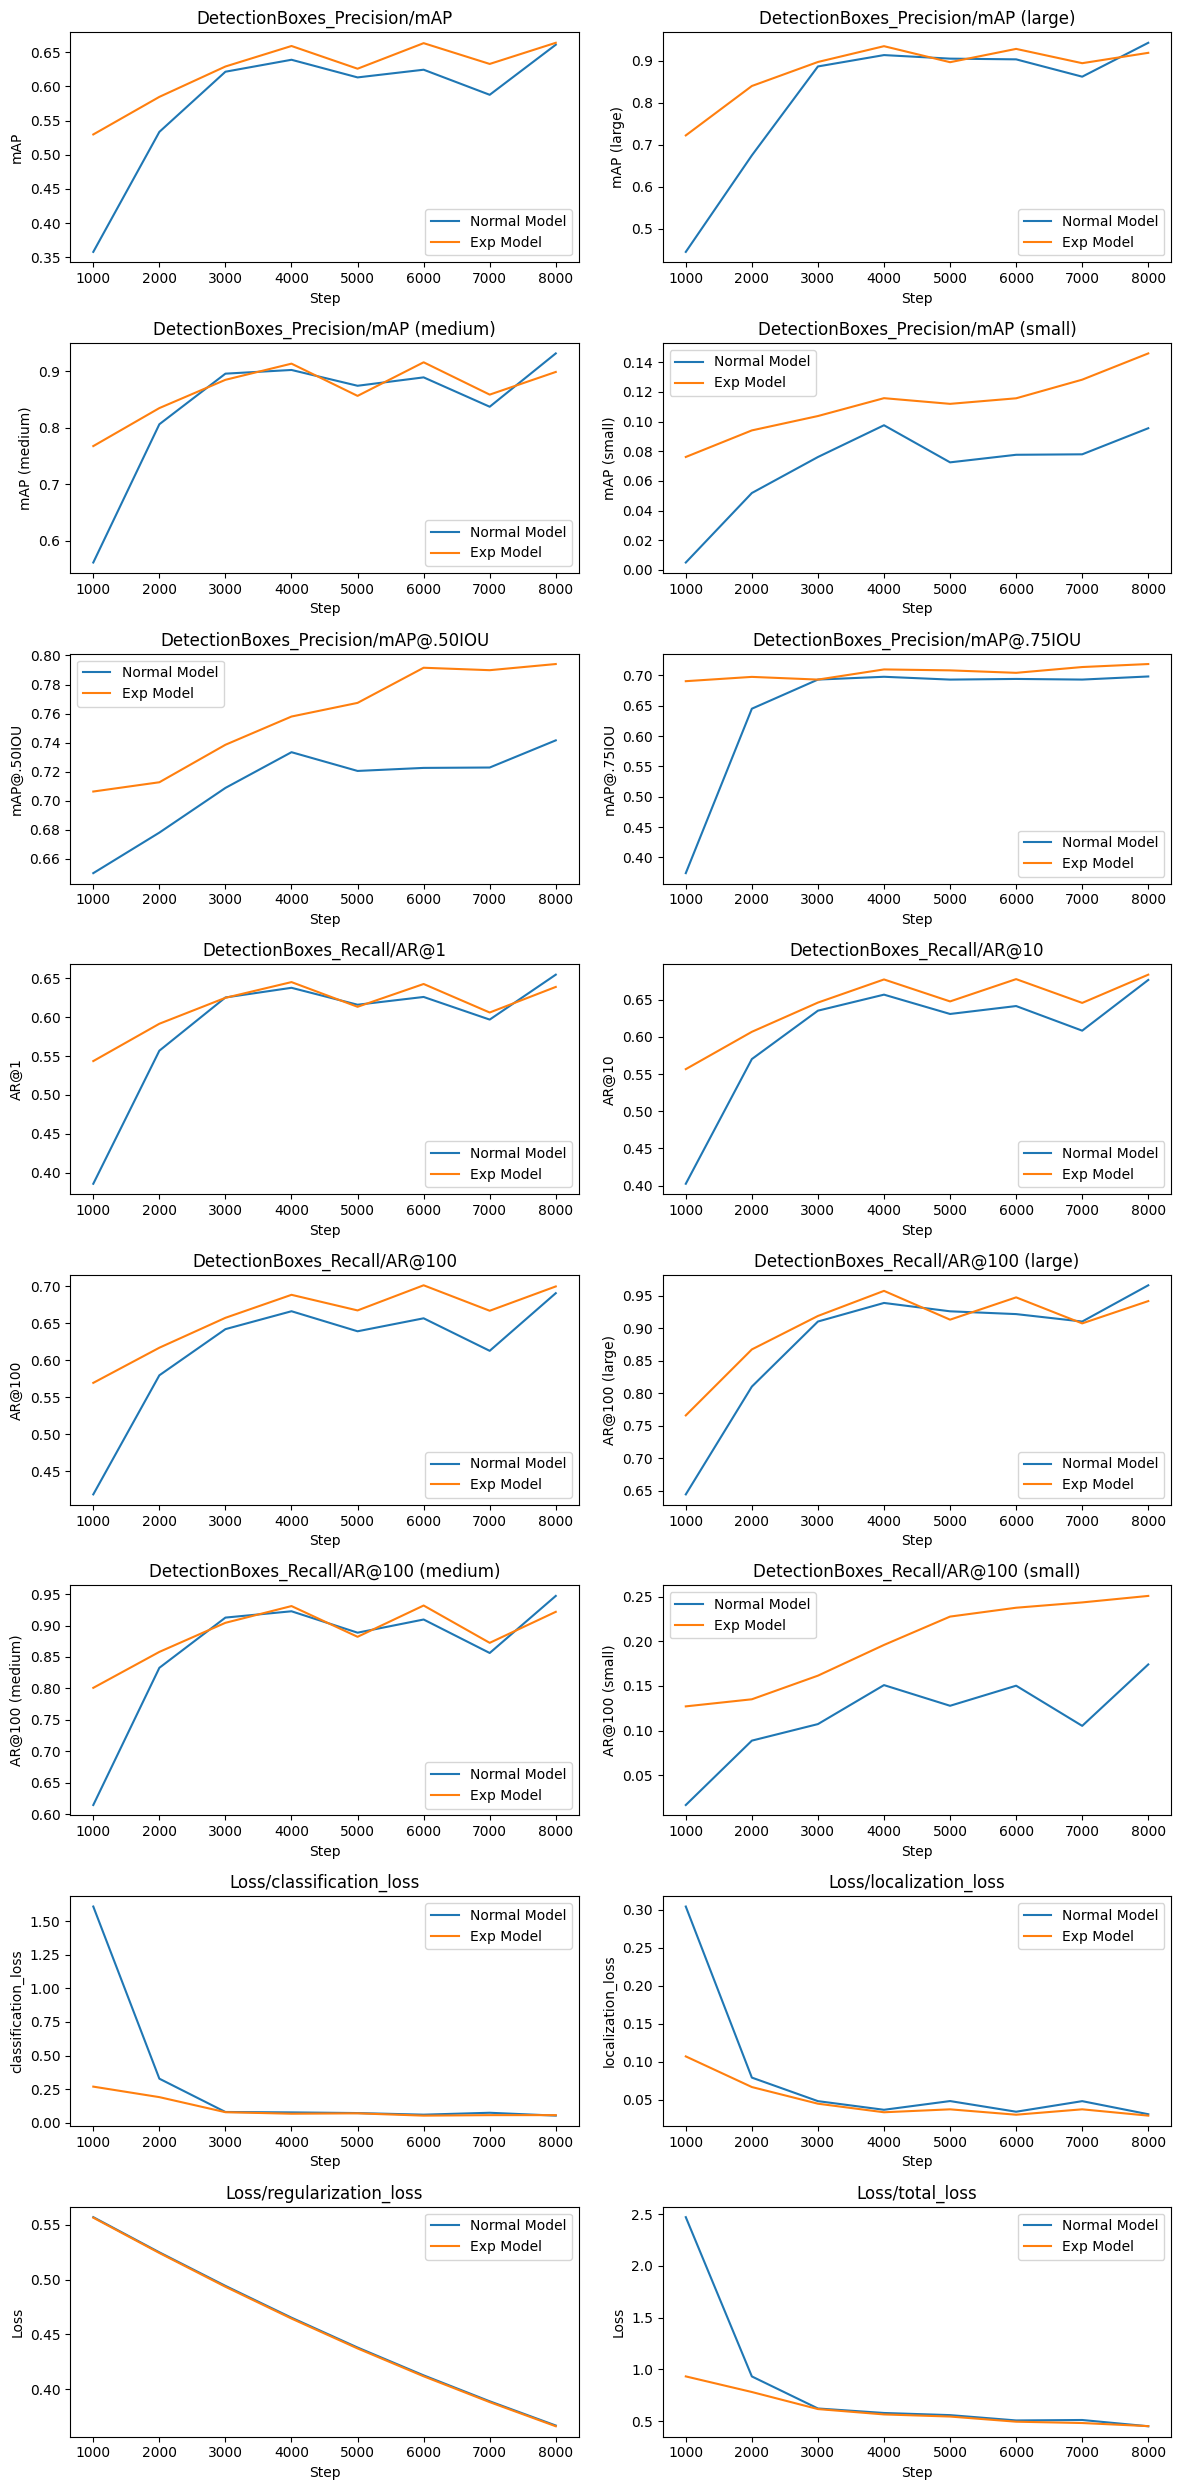

In [26]:
columns_to_compare = df_normal_model.columns.tolist()
columns_to_compare.remove('step')

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(12, 25))

x = 0

for i in range(0, 8):
    for j in range(0, 2):
        axes[i, j].plot(df_normal_model['step'], df_normal_model[columns_to_compare[x]], label='Normal Model')
        axes[i, j].plot(df_exp_model['step'], df_exp_model[columns_to_compare[x]], label='Exp Model')
        axes[i, j].set_title(columns_to_compare[x])
        axes[i, j].set_xlabel('Step')
        if i<=6:
            axes[i, j].set_ylabel(columns_to_compare[x].split("/")[1])
        else:
            axes[i, j].set_ylabel('Loss')
        axes[i, j].legend()
        x += 1

plt.tight_layout()
plt.show()

## Test trained model on test images

based on [Object Detection API Demo](https://github.com/tensorflow/models/blob/master/research/object_detection/colab_tutorials/object_detection_tutorial.ipynb) and [Inference from saved model tf2 colab](https://github.com/tensorflow/models/blob/master/research/object_detection/colab_tutorials/inference_from_saved_model_tf2_colab.ipynb).

In [27]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
import random
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

%matplotlib inline

In [28]:
# Extract Brain Tumor Test Image Dataset from drive
!unzip -qq "/content/drive/MyDrive/brain_tumor_detection/Brain MRI Dataset/test-imgs-coco-veryclean.zip" -d "/content"
print("Unzip Dataset Done")

Unzip Dataset Done


In [29]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path (this can be local or on colossus)

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [35]:
category_index = label_map_util.create_category_index_from_labelmap(labelmap_path, use_display_name=True)

In [36]:
normal_model_dir = f'{model_dir}inference_graph'
exp_model_dir = f'{model_exp_dir}inference_graph'

In [37]:
tf.keras.backend.clear_session()
model = tf.saved_model.load(f'{normal_model_dir}/saved_model')
model_exp = tf.saved_model.load(f'{exp_model_dir}/saved_model')

In [38]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy()
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)

  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()

  return output_dict

### COCO Evaluation Metrics

In [39]:
import json
import cv2
import numpy as np

def create_pred_json(model, ground_truth, prediction, image_path_root):

  # Confidence threshold to filter detections
  confidence_threshold = 0.5  # Adjust this threshold as needed

  # Load custom_annotations.json
  with open(ground_truth, 'r') as f:
      custom_annotations = json.load(f)

  # Initialize a list to store the predictions
  model_predictions = []

  for annotation in custom_annotations['annotations']:
      image_id = annotation['image_id']
      image_filename = None

      # Find the corresponding image filename in the custom_annotations.json
      for image_info in custom_annotations['images']:
          if image_info['id'] == image_id:
              image_filename = image_info['file_name']
              break

      if image_filename is not None:
          image_path = image_path_root + image_filename  # Replace with the correct path
          image_np = load_image_into_numpy_array(image_path)

          # Perform inference on the image using your object detection model
          output_dict = run_inference_for_single_image(model, image_np)

          # Extract predictions from the model's output
          for i in range(len(output_dict['detection_boxes'][0])):
              confidence = float(output_dict['detection_scores'][i])

              # Filter out low-confidence detections
              if confidence >= confidence_threshold:
                  category_id = int(output_dict['detection_classes'][i])
                  normalized_bbox = output_dict['detection_boxes'][i]  # Assuming they are in [ymin, xmin, ymax, xmax] format

                  # Recompute bounding box coordinates to [xmin, xmax, ymin, ymax] format
                  im_height, im_width, _ = image_np.shape
                  ymin, xmin, ymax, xmax = normalized_bbox
                  bbox = [int(xmin * im_height), int(xmax * im_width), int(ymin * im_height), int(ymax * im_width)]

                  x = bbox[0]
                  y = bbox[2]
                  width = bbox[1] - bbox[0]
                  height = bbox[3] - bbox[2]
                  coco_bbox = [x, y, width, height]

                  # Create a prediction dictionary for this prediction
                  prediction_entry = {
                      'image_id': image_id,
                      'category_id': category_id,
                      'bbox': coco_bbox,
                      'score': confidence
                  }

                  model_predictions.append(prediction_entry)

  # Save the filtered model predictions to a new JSON file
  with open(prediction, 'w') as outfile:
      json.dump(model_predictions, outfile)

In [40]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

def run_coco_eval(ground_truth, prediction):

  # Load your custom dataset annotations (in COCO format)
  custom_coco = COCO(ground_truth)

  # Load your model's predictions (in COCO format)
  custom_predictions = custom_coco.loadRes(prediction)

  # Create COCOeval object
  coco_eval = COCOeval(custom_coco, custom_predictions, 'bbox')

  # Run evaluation
  coco_eval.evaluate()
  coco_eval.accumulate()
  coco_eval.summarize()

#### COCO Evaluation Metrics (Normal Model)

In [41]:
ground_truth = "/content/test/annotations/_annotations.coco.json"
prediction = "/content/test/annotations/model_predictions.json"
image_path_root = "/content/test/images/"

create_pred_json(model, ground_truth, prediction, image_path_root)
run_coco_eval(ground_truth, prediction)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.15s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.843
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.951
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.938
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.393
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.860
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.903
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.883
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.885
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets

#### COCO Evaluation Metrics (Experiment Model)

In [42]:
ground_truth = "/content/test/annotations/_annotations.coco.json"
prediction = "/content/test/annotations/model_exp_predictions.json"
image_path_root = "/content/test/images/"

create_pred_json(model_exp, ground_truth, prediction, image_path_root)
run_coco_eval(ground_truth, prediction)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.21s).
Accumulating evaluation results...
DONE (t=0.07s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.836
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.949
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.946
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.444
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.845
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.899
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.877
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.880
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets

### Show Diagram

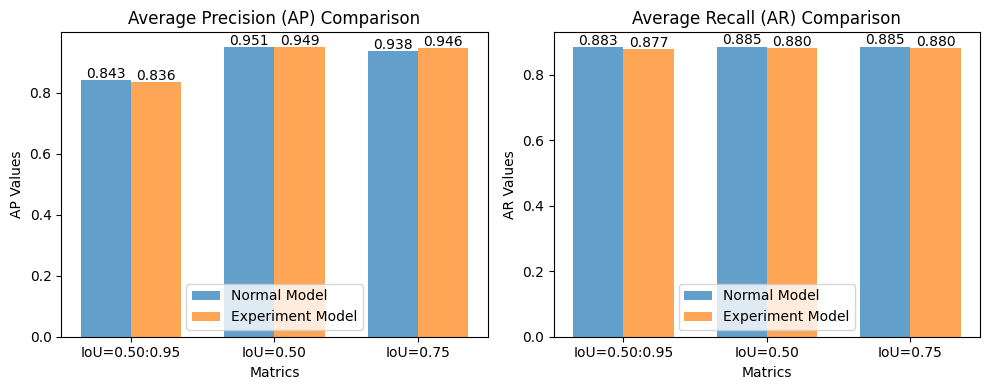

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Data
ap_normal_model = [0.843, 0.951, 0.938]
ap_experiment_model = [0.836, 0.949, 0.946]
ar_normal_model = [0.883, 0.885, 0.885]
ar_experiment_model = [0.877, 0.880, 0.880]

categories = ['IoU=0.50:0.95', 'IoU=0.50', 'IoU=0.75']

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(categories))

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot for AP
axs[0].bar(index, ap_normal_model, bar_width, label='Normal Model', alpha=0.7)
axs[0].bar(index + bar_width, ap_experiment_model, bar_width, label='Experiment Model', alpha=0.7)

axs[0].set_xlabel('Matrics')
axs[0].set_ylabel('AP Values')
axs[0].set_title('Average Precision (AP) Comparison')
axs[0].set_xticks(index + bar_width / 2)
axs[0].set_xticklabels(categories)

# Add values at the center of the bars
for i, val in enumerate(ap_normal_model):
    axs[0].text(index[i], val + 0.02, f'{val:.3f}', ha='center', va='center')

for i, val in enumerate(ap_experiment_model):
    axs[0].text(index[i] + bar_width, val + 0.02, f'{val:.3f}', ha='center', va='center')

axs[0].legend()

# Plot for AR
axs[1].bar(index, ar_normal_model, bar_width, label='Normal Model', alpha=0.7)
axs[1].bar(index + bar_width, ar_experiment_model, bar_width, label='Experiment Model', alpha=0.7)

axs[1].set_xlabel('Matrics')
axs[1].set_ylabel('AR Values')
axs[1].set_title('Average Recall (AR) Comparison')
axs[1].set_xticks(index + bar_width / 2)
axs[1].set_xticklabels(categories)

# Add values at the center of the bars
for i, val in enumerate(ar_normal_model):
    axs[1].text(index[i], val + 0.02, f'{val:.3f}', ha='center', va='center')

for i, val in enumerate(ar_experiment_model):
    axs[1].text(index[i] + bar_width, val + 0.02, f'{val:.3f}', ha='center', va='center')

axs[1].legend()

# Set y-axis limits to provide some space above the bars
# axs[0].set_ylim(0, 0.85)  # Adjust the limits as needed
# axs[1].set_ylim(0, 0.85)  # Adjust the limits as needed

# Add space between subplots
plt.tight_layout()

# Show the plots
plt.show()


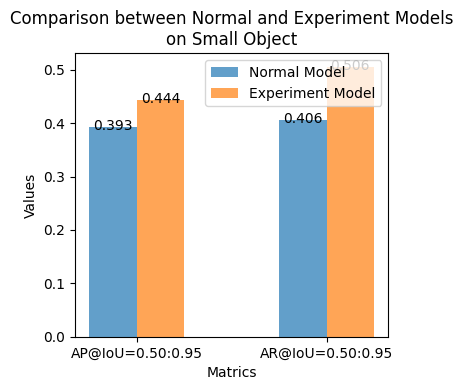

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Data
normal_model = [0.393, 0.406]
experiment_model = [0.444, 0.506]
categories = ['AP@IoU=0.50:0.95', 'AR@IoU=0.50:0.95']

# Set the width of the bars
bar_width = 0.25
index = np.arange(len(categories))

# Create subplots to allow for multiple bars side by side
fig, ax = plt.subplots(figsize=(4, 4))

# Create bars for the normal_model
normal_bars = ax.bar(index, normal_model, bar_width, label='Normal Model', alpha=0.7)

# Create bars for the experiment_model
experiment_bars = ax.bar(index + bar_width, experiment_model, bar_width, label='Experiment Model', alpha=0.7)

# Set the x-axis labels
ax.set_xlabel('Matrics')
ax.set_ylabel('Values')

# Set the title with a line break
ax.set_title('Comparison between Normal and Experiment Models\non Small Object')

# Set the x-axis ticks and labels with rotation
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories)

# Add values at the center of the bars
for i, val in enumerate(normal_model):
    ax.text(index[i], val + 0.002, f'{val:.3f}', ha='center', va='center')

for i, val in enumerate(experiment_model):
    ax.text(index[i] + bar_width, val + 0.002, f'{val:.3f}', ha='center', va='center')

# Add a legend
ax.legend()

# Set y-axis limits to provide some space above the bars
# ax.set_ylim(0, 0.1)  # Adjust the limits as needed

# Show the plot
plt.tight_layout()
plt.show()


### Inference Images with IoU Score

In [51]:
def calculate_iou(box1, box2):
    """
    Calculate the Intersection over Union (IoU) between two bounding boxes.

    Args:
        box1 (list): [x1, y1, x2, y2] coordinates of the first bounding box.
        box2 (list): [x1, y1, x2, y2] coordinates of the second bounding box.

    Returns:
        float: The IoU score.
    """
    x1, y1, x2, y2 = box1
    x3, y3, x4, y4 = box2

    #Calculate the intersection area
    intersection_x1 = max(x1, x3)
    intersection_y1 = max(y1, y3)
    intersection_x2 = min(x2, x4)
    intersection_y2 = min(y2, y4)

    intersection_area = max(0, intersection_x2 - intersection_x1) * max(0, intersection_y2 - intersection_y1)

    #Calculate the area of each bounding box
    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x4 - x3) * (y4 - y3)

    #Calculate the Union area
    union_area = box1_area + box2_area - intersection_area

    # Calculate IoU
    iou = intersection_area / union_area

    return iou

In [52]:
import json
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

def run_iou_inference(ground_truth, prediction, image_path_root, total_image):

  # Load custom_annotations.json and model_predictions.json
  with open(ground_truth, 'r') as f:
      custom_annotations = json.load(f)

  with open(prediction, 'r') as f:
      model_predictions = json.load(f)

  # Choose 10 random images to visualize
  random.seed(42)  # Set a random seed for reproducibility
  selected_images = random.sample(custom_annotations['images'], total_image)

  # Iterate through selected images
  for image_info in selected_images:
      image_id = image_info['id']
      image_filename = image_info['file_name']
      image_path = image_path_root + image_filename  # Replace with the correct path

      # Load the image
      image_np = load_image_into_numpy_array(image_path)

      # Get ground truth annotations for this image
      ground_truth_boxes = []
      for annotation in custom_annotations['annotations']:
          if annotation['image_id'] == image_id:
              bbox = annotation['bbox']
              ground_truth_boxes.append(bbox)

      # Get predicted boxes for this image
      predicted_boxes = []
      for prediction in model_predictions:
          if prediction['image_id'] == image_id:
              bbox = prediction['bbox']
              predicted_boxes.append(bbox)

      # print(ground_truth_boxes)
      # print(predicted_boxes)

      # Visualize the image with ground truth and predicted bounding boxes
      for bbox in ground_truth_boxes:
          x, y, w, h = bbox
          pt1 = (int(x), int(y))  # Top-left corner
          pt2 = (int(x + w), int(y + h))  # Bottom-right corner
          cv2.rectangle(image_np, pt1, pt2, (0, 255, 0), 4)  # Green for ground truth

      for bbox in predicted_boxes:
          x, y, w, h = bbox
          pt1 = (int(x), int(y))  # Top-left corner
          pt2 = (int(x + w), int(y + h))  # Bottom-right corner
          cv2.rectangle(image_np, pt1, pt2, (255, 0, 0), 4)  # Blue for predictions

      # Calculate IoU for each pair of ground truth and predicted boxes
      iou_scores = []
      for gt_bbox in ground_truth_boxes:
          gt_x, gt_y, gt_w, gt_h = map(int, gt_bbox)
          gt_x1 = gt_x
          gt_y1 = gt_y
          gt_x2 = gt_x + gt_w
          gt_y2 = gt_y + gt_h
          fix_gt_bbox = [gt_x1, gt_y1, gt_x2, gt_y2]
          for pred_bbox in predicted_boxes:
              pred_x, pred_y, pred_w, pred_h = map(int, pred_bbox)
              pred_x1 = pred_x
              pred_y1 = pred_y
              pred_x2 = pred_x + pred_w
              pred_y2 = pred_y + pred_h
              fix_pred_bbox = [pred_x1, pred_y1, pred_x2, pred_y2]
              iou = calculate_iou(fix_gt_bbox, fix_pred_bbox)
              iou_scores.append(iou)

      avg_iou = np.mean(iou_scores)

      # Display image ID and average IoU on the image using cv2.putText
      text = f'Image ID: {image_id}, Avg. IoU: {avg_iou:.2f}'
      cv2.putText(image_np, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

      # Display the image
      plt.figure(figsize=(10, 6))
      plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
      plt.title(f'Image with Ground Truth (Green) and Predictions (Blue)')
      plt.axis('off')
      plt.show()

      print('=' * 30)

#### With Normal Model

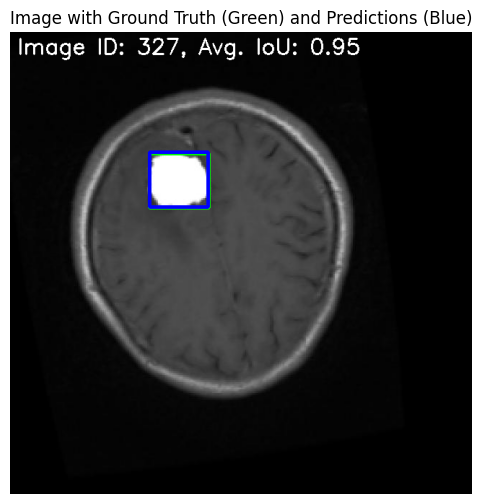

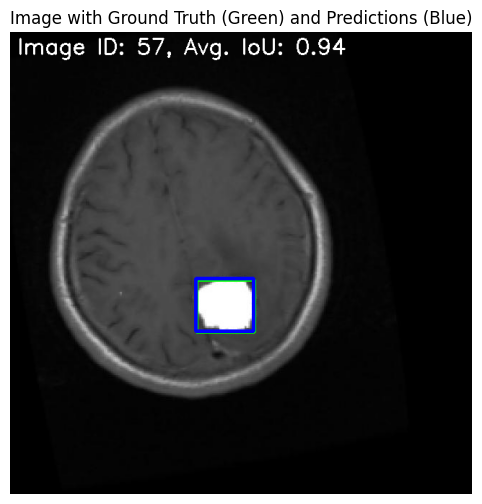

In [53]:
ground_truth = "/content/test/annotations/_annotations.coco.json"
prediction = "/content/test/annotations/model_predictions.json"
image_path_root = "/content/test/images/"
total_image = 2 #max 385

run_iou_inference(ground_truth, prediction, image_path_root, total_image)

#### With Experiment Model

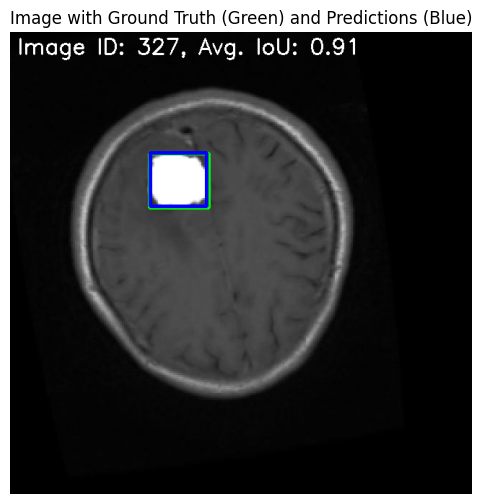

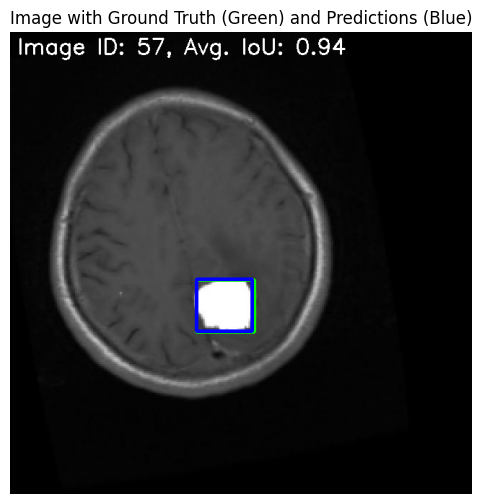

In [54]:
ground_truth = "/content/test/annotations/_annotations.coco.json"
prediction = "/content/test/annotations/model_exp_predictions.json"
image_path_root = "/content/test/images/"
total_image = 2 #max 385

run_iou_inference(ground_truth, prediction, image_path_root, total_image)

## Calculate Model Inference Time

In [55]:
import time
import numpy as np

def calc_inf_time(model):
    # Create a sample input tensor
    random_data = np.random.randint(0, 256, size=(1, 640, 640, 3), dtype=np.uint8)
    input_tensor = tf.convert_to_tensor(random_data)

    # Warm-up the model
    warmup_iterations = 20
    for _ in range(warmup_iterations):
        model(input_tensor)

    # Measure inference time
    num_iterations = 100  # Adjust as needed
    start_time = time.time()
    for _ in range(num_iterations):
        model(input_tensor)
    end_time = time.time()

    inference_time = (end_time - start_time) / num_iterations
    # print(f"Inference Time per Iteration: {inference_time} seconds")
    return inference_time

#Exp model Inference Time per Iteration: 0.0326056973139445 seconds on GPU (T4)
#Normal model Inference Time per Iteration: 0.018560765584309896 seconds on GPU (T4)

In [56]:
print(f"Normal model Inference Time per Iteration: {calc_inf_time(model)} seconds on CPU")
print(f"Experiment model Inference Time per Iteration: {calc_inf_time(model_exp)} seconds on CPU")

Normal model Inference Time per Iteration: 0.3344663333892822 seconds on CPU
Experiment model Inference Time per Iteration: 0.6170112323760987 seconds on CPU


## All Evaluation Result

In [57]:
import json
import numpy as np

def calc_iou(box1, box2):
    # Calculate IoU between two bounding boxes [x, y, width, height]
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[0] + box1[2], box2[0] + box2[2])
    y2 = min(box1[1] + box1[3], box2[1] + box2[3])

    intersection_area = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)

    box1_area = box1[2] * box1[3]
    box2_area = box2[2] * box2[3]

    union_area = box1_area + box2_area - intersection_area

    iou = intersection_area / union_area

    return iou

def evaluate_predictions(ground_truth, predictions, iou_threshold=0.50):
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    for gt_annotation in ground_truth:
        gt_box = gt_annotation['bbox']
        gt_id = gt_annotation['id']
        matched_prediction = None
        max_iou = 0

        for pred_annotation in predictions:
            pred_box = pred_annotation['bbox']
            iou = calc_iou(gt_box, pred_box)

            if iou > max_iou:
                max_iou = iou
                matched_prediction = pred_annotation

        if max_iou >= iou_threshold:
            true_positives += 1
            # Remove matched prediction to avoid duplicate matches
            # predictions.remove(matched_prediction)
        else:
            false_negatives += 1

    false_positives = len(predictions) - true_positives

    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    iou = true_positives / (true_positives + false_positives + false_negatives)
    dsc = true_positives / (((2 * true_positives) + false_positives + false_negatives)/2)
    si = (2 * true_positives) / ((2 * true_positives) + false_positives + false_negatives)

    return precision, recall, iou, dsc, si, true_positives, false_positives, false_negatives

In [63]:
# Normal Model on Test Data
# Load ground truth annotations
with open('/content/test/annotations/_annotations.coco.json', 'r') as file:
    ground_truth_data = json.load(file)

# Load model predictions
with open('/content/test/annotations/model_predictions.json', 'r') as file:
    predictions_data = json.load(file)

ground_truth_annotations = ground_truth_data['annotations']
model_predictions = predictions_data

# Evaluate predictions
precision, recall, iou, dsc, si, tp, fp, fn = evaluate_predictions(ground_truth_annotations, model_predictions)

# Print results
print("Normal Model Result")
print("="*30)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Dice Similarity Coefficient: {dsc:.4f}')
print(f'Intersection of Union: {iou:.4f}')
print(f'Similarity Index: {si:.4f}')
print(f'TP: {tp}, FP: {fp}, FN: {fn}')

Normal Model Result
Precision: 0.9579
Recall: 0.9771
Dice Similarity Coefficient: 0.9674
Intersection of Union: 0.9368
Similarity Index: 0.9674
TP: 341, FP: 15, FN: 8


In [64]:
# Normal Model on Test Data
# Load ground truth annotations
with open('/content/test/annotations/_annotations.coco.json', 'r') as file:
    ground_truth_data = json.load(file)

# Load model predictions
with open('/content/test/annotations/model_exp_predictions.json', 'r') as file:
    predictions_data = json.load(file)

ground_truth_annotations = ground_truth_data['annotations']
model_predictions = predictions_data

# Evaluate predictions
precision, recall, iou, dsc, si, tp, fp, fn = evaluate_predictions(ground_truth_annotations, model_predictions)

# Print results
print("Experiment Model Result")
print("="*30)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Dice Similarity Coefficient: {dsc:.4f}')
print(f'Intersection of Union: {iou:.4f}')
print(f'Similarity Index: {si:.4f}')
print(f'TP: {tp}, FP: {fp}, FN: {fn}')

Experiment Model Result
Precision: 0.8979
Recall: 0.9828
Dice Similarity Coefficient: 0.9384
Intersection of Union: 0.8840
Similarity Index: 0.9384
TP: 343, FP: 39, FN: 6


### Experimental (Do not use this score)

In [154]:
import json
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

def run_iou_avg(ground_truth, prediction, image_path_root):
   # Load custom_annotations.json and model_predictions.json
    with open(ground_truth, 'r') as f:
        custom_annotations = json.load(f)

    with open(prediction, 'r') as f:
        model_predictions = json.load(f)

    all_iou = []
    # Iterate through selected images
    for image_info in custom_annotations['images']:
        image_id = image_info['id']

        # Get ground truth annotations for this image
        ground_truth_boxes = []
        for annotation in custom_annotations['annotations']:
            if annotation['image_id'] == image_id:
                bbox = annotation['bbox']
                ground_truth_boxes.append(bbox)

        # Get predicted boxes for this image
        predicted_boxes = []
        for prediction in model_predictions:
            if prediction['image_id'] == image_id:
                bbox = prediction['bbox']
                predicted_boxes.append(bbox)

        # Calculate IoU for each pair of ground truth and predicted boxes
        iou_scores = []
        for gt_bbox in ground_truth_boxes:
            gt_x, gt_y, gt_w, gt_h = map(int, gt_bbox)
            gt_x1 = gt_x
            gt_y1 = gt_y
            gt_x2 = gt_x + gt_w
            gt_y2 = gt_y + gt_h
            fix_gt_bbox = [gt_x1, gt_y1, gt_x2, gt_y2]
            for pred_bbox in predicted_boxes:
                pred_x, pred_y, pred_w, pred_h = map(int, pred_bbox)
                pred_x1 = pred_x
                pred_y1 = pred_y
                pred_x2 = pred_x + pred_w
                pred_y2 = pred_y + pred_h
                fix_pred_bbox = [pred_x1, pred_y1, pred_x2, pred_y2]
                iou = calculate_iou(fix_gt_bbox, fix_pred_bbox)

                if iou >= 0.50:
                    iou_scores.append(iou)

        avg_iou = np.mean(iou_scores)
        if avg_iou > 0.50:
            all_iou.append(avg_iou)

    all_avg_iou = np.mean(all_iou)

    return all_avg_iou

In [155]:
# Get last data from evaluaion
normal_model_precision = df_normal_model.tail(1).loc[:,'DetectionBoxes_Precision/mAP@.50IOU'].values[0]
normal_model_recall = df_normal_model.tail(1).loc[:,'DetectionBoxes_Recall/AR@1'].values[0]
normal_model_iou = run_iou_avg("/content/test/annotations/_annotations.coco.json",
                                     "/content/test/annotations/model_predictions.json",
                                     "/content/test/images/")
exp_model_precision = df_exp_model.tail(1).loc[:,'DetectionBoxes_Precision/mAP@.50IOU'].values[0]
exp_model_recall = df_exp_model.tail(1).loc[:,'DetectionBoxes_Recall/AR@1'].values[0]
exp_model_iou = run_iou_avg("/content/test/annotations/_annotations.coco.json",
                                     "/content/test/annotations/model_exp_predictions.json",
                                     "/content/test/images/")

Mean of empty slice.
invalid value encountered in double_scalars


In [156]:
# Normal Model on Eval Data
print(f"Precision: {normal_model_precision}")
print(f"Recall: {normal_model_recall}")
print(f"IoU: {normal_model_iou}")

Precision: 0.7415310144424438
Recall: 0.6546666622161865
IoU: 0.9305066505727586


In [157]:
# Experiment Model on Eval Data
print(f"Precision: {exp_model_precision}")
print(f"Recall: {exp_model_recall}")
print(f"IoU: {exp_model_iou}")

Precision: 0.7940922975540161
Recall: 0.6388888955116272
IoU: 0.9238436750224678
